In [96]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [23]:
plt.style.use('fivethirtyeight')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [3]:
df = pd.read_csv(r"C:\Users\midhu\Downloads\movies.csv")
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


# 1. Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [40]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

There are Seven Columns with less number of Null values (released, score, votes, writer, star, country, runtime), 
Therefore these entries with null values in these columns can be removed and it will not affect the overall outcome

In [50]:
null_class = ('released', 'score', 'votes', 'writer', 'star', 'country', 'runtime')
df.dropna(axis = 0, subset = null_class,inplace=True)

In [73]:
df.isnull().sum()

name           0
rating        72
genre          0
year           0
released       0
score          0
votes          0
director       0
writer         0
star           0
country        0
budget      2166
gross        182
company       13
runtime        0
dtype: int64

In [55]:
df['rating'].unique()

array(['R', 'PG', 'G', nan, 'Not Rated', 'NC-17', 'Approved', 'TV-PG',
       'PG-13', 'Unrated', 'X', 'TV-MA', 'TV-14'], dtype=object)

In [66]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

The 'rating' column is categorical data such as R, PG, G etc.
* So the null values can be imputed with the most frequent entries

In [ ]:
rating_mod = df['rating'].mode().iloc[0]
df['rating'].fillna(rating_mod, inplace=True)

Null values at the columns 'budget' and 'gross' can be filler with the mea values of the respective columns  

In [74]:
mean_budget = df['budget'].mean()
mean_gross = df['gross'].mean()
df['budget'].fillna(mean_budget,inplace=True)
df['gross'].fillna(mean_gross, inplace=True)

Since the 'company' names are unique for each entries conisdering the behaviour of the data set, entries with null at 'company' attribute can be removed

In [105]:
df = df.dropna(axis=0, subset = ['company'])
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

Changing Data types

In [138]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        Int64
gross         int64
company      object
runtime       int64
dtype: object

In [118]:
df['budget'] = df['budget'].round().astype('Int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

Within the dataset, there are two genres, namely 'Musical' and 'Music,' which are essentially synonymous. To achieve consistency, it is advisable to rename 'Musical' to 'Music' for uniformity.

In [ ]:
df['genre'] = df['genre'].str.replace('Musical', 'Music')
# df['genre'].unique()

The year in the columns 'year' and 'released' doesnt match. So creating a new column with the corrected year followed by deleting the 'year' column

In [ ]:
df['corrected_year'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)
df.drop(columns='year',inplace=True)
# df.head()

 Sorting the values according to gross earning

In [ ]:
df.sort_values(by = 'gross', ascending  = False, inplace=True)
# df.head()

Deleting duplicates

In [ ]:
df.drop_duplicates()

Resetting the Index

In [162]:
df.reset_index(drop=True, inplace = True)

In [163]:
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,corrected_year
0,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
1,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
2,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
3,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
4,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


# 2. Data Analysis


This section focuses on the correlation analysis of the data inorder to find relations with in the data, especially the gross earning. For this purpose a correlation matrix should be created. To find the highest correlation, pearson method is used.

In [167]:
#lets construct the correlation matrix using pearson correlation.
corr_matrix = df.corr(method='pearson',numeric_only=True)

In [259]:
corr_matrix

,score,votes,budget,gross,runtime,corrected_year
score,1.000000,0.409432,0.064173,0.182866,0.399965,0.106108
votes,0.409432,1.000000,0.420829,0.628743,0.308907,0.218802
budget,0.064173,0.420829,1.000000,0.711616,0.265089,0.261098
gross,0.182866,0.628743,0.711616,1.000000,0.241296,0.245793
runtime,0.399965,0.308907,0.265089,0.241296,1.000000,0.119595
corrected_year,0.106108,0.218802,0.261098,0.245793,0.119595,1.000000


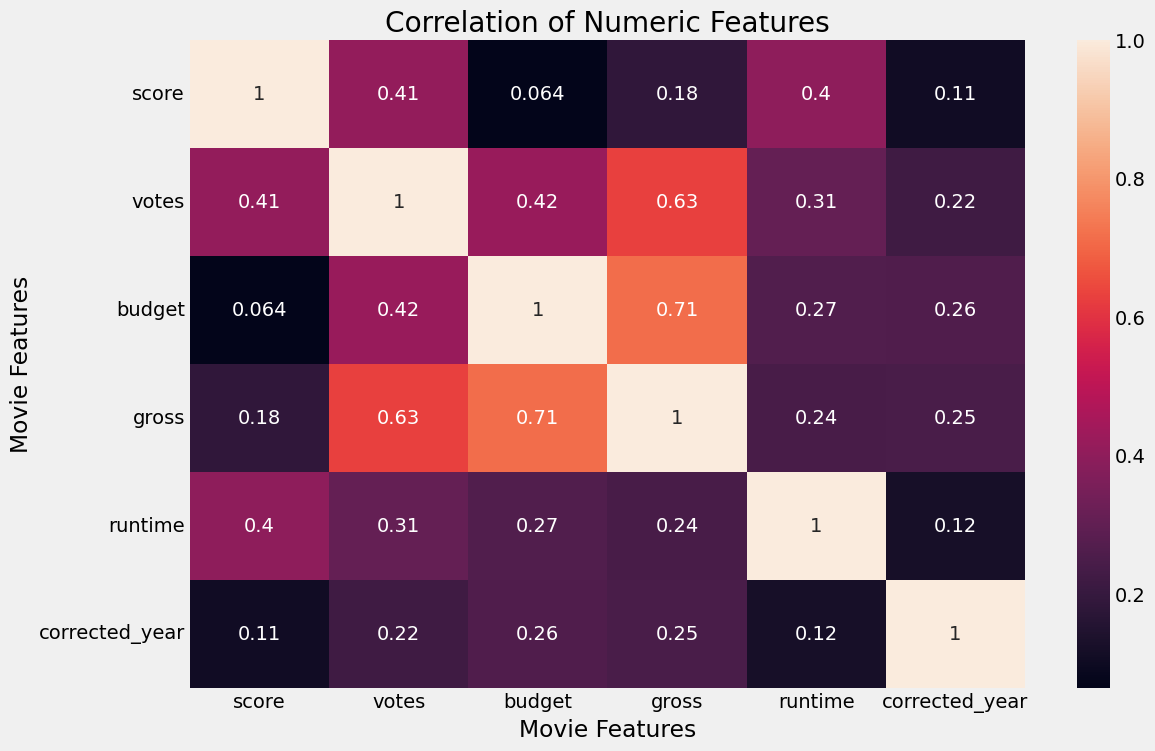

In [172]:
# Generating a heatmap to visualise the correlations 

sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation of Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()


Bigger the correlation constatant stronger the correlation between the attributes. Here the highest pearson constants are **0.71** (gross earning and budget) and **0.63** (gross earning and votes). Now it is found that highest correlation is between the gross earning and budget.


### Regression Plots

In [187]:
#changing the data type into float64 for the plot (it will not work in int data type)

df['budget'] = df['budget'].astype('float64')
df['gross'] = df['gross'].astype('float64')

Text(0.5, 1.0, 'Regression Plot : Budget vs Gross Earning')

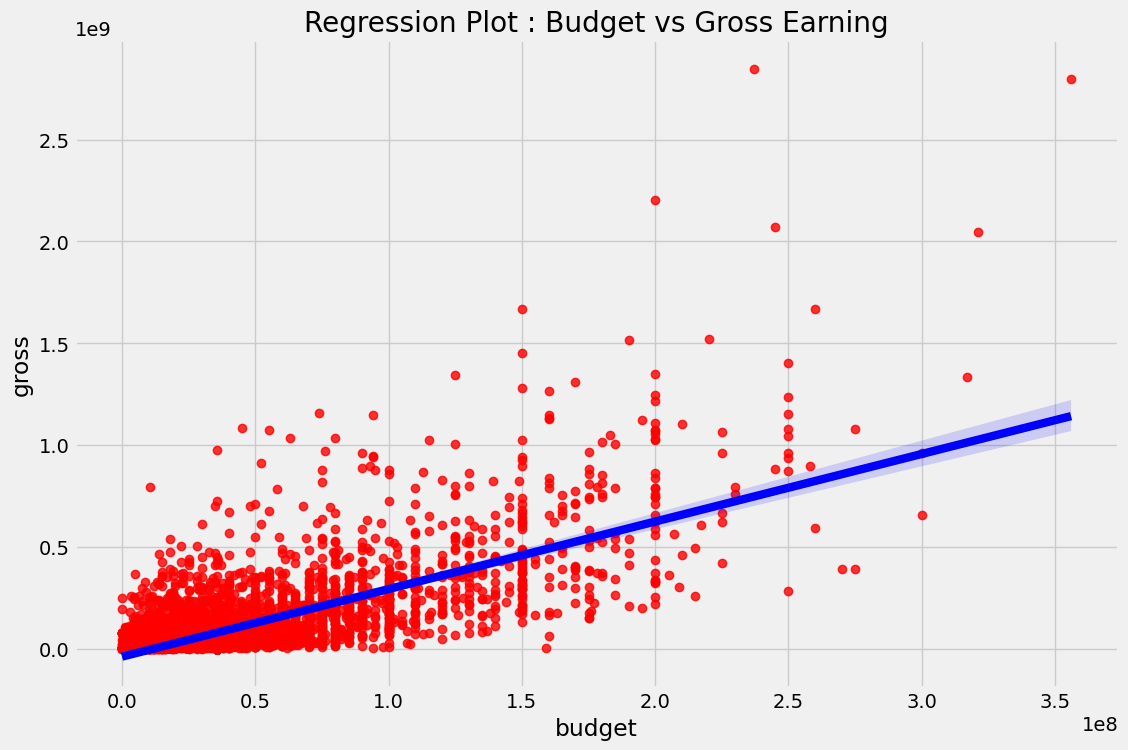

In [189]:
#Ploting budget vs gross earning using seaborn

sns.regplot(x = 'budget', 
            y = 'gross', 
            data= df , 
            scatter_kws = {'color': 'red'}, 
            line_kws = {'color': 'blue'})
plt.title('Regression Plot : Budget vs Gross Earning')

The scatter plot, accompanied by a regression line, illustrates a positive correlation between the budgets of movies and their gross earnings. Each red scatter point on the plot represents an individual movie, while the blue regression line visually encapsulates the trend, indicating that higher budgets tend to result in higher box office earnings. In essence, it provides a concise summary of the connection between budget and gross earnings within the dataset.

Text(0.5, 1.0, 'Regression Plot : Votes vs Gross')

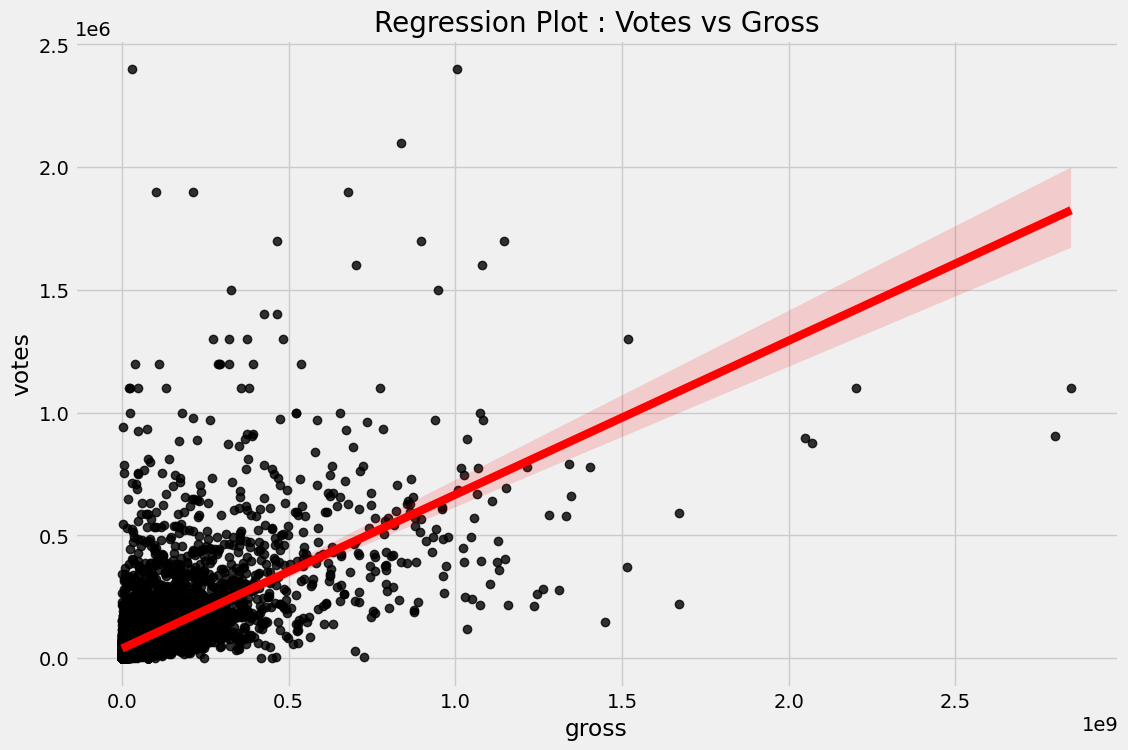

In [191]:
# Plotting regression plot of votes vs gross
sns.regplot(x = 'gross', y = 'votes', data = df, scatter_kws = {'color':'black'}, line_kws = {'color' : 'red'})
plt.title('Regression Plot : Votes vs Gross') 

The presented scatter plot, accompanied by a regression line, provides a visual representation of the connection between the quantity of votes and the revenue generated by movies within the dataset. In this visualization, each point corresponds to a specific movie, with the horizontal axis (x-axis) representing the number of votes and the vertical axis (y-axis) indicating the gross earnings. The individual data points are depicted in red, while the blue regression line offers a linear model, signifying a positive correlation between these two variables.

#### Summary
The primary observation underscores that 'budget' and 'votes' exhibit the strongest correlations with gross earnings. Notably, both factors exhibit a positive correlation, implying that as a movie's budget and audience ratings increase, there is a corresponding tendency for higher gross earnings. These findings hold valuable implications for decision-making within the movie industry, as they emphasize the pivotal role played by these factors in influencing box office success.

## Genre and Profit

#### This analysis will help to find the audiences taste of movies on a large scale.

The profit of movies reflects the acceptance of the audience. A plot with profit and genre will help to find the choice of the audience.
* Step - 1 : Created a 'Profit' Column (formula: Profit = gross - budget)
* Step - 2 : Changed the data type into int64 for plotting the graph
* step - 3 : Plotted the graph using seaborn

In [ ]:
# Column creation and datatype conversion

df['profit'] = df['gross'] - df['budget']
df['profit'] = df['profit'].round().astype('int64')
# df.dtypes

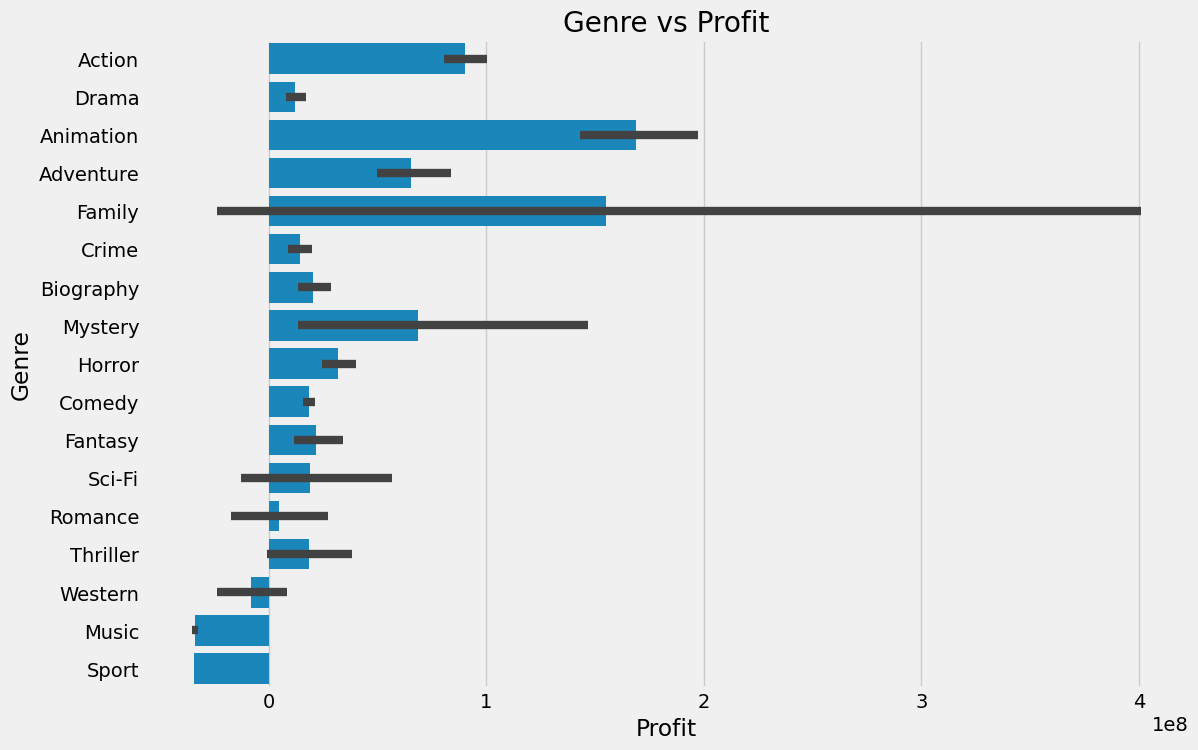

In [260]:
# Plotting the Graph

sns.barplot(x = 'profit', y = 'genre',data= df)
plt.xlabel('Profit')
plt.ylabel('Genre')
plt.title('Genre vs Profit')
plt.show()

#### Summary
The plot clearly indicates that animation movies generate the highest profits, suggesting a strong preference among the audience for this genre. Following closely is the 'family' genre, which secures the second position in terms of profitability. However, on a larger scale, genres like Western, Music, and Sport have shown relatively poor performance, resulting in lower revenue.